# 0. Install and Import Dependencies

In [1]:
!pip install neuralprophet

In [2]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# 1. Read in Data and Process Dates

In [4]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
syd = df[df['Location']=='Sydney']
syd['Date'] = pd.to_datetime(syd['Date'])
syd.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-7-1a4ae1fbd3d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syd['Date'] = pd.to_datetime(syd['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


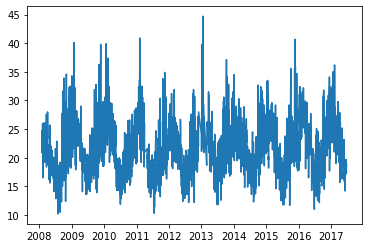

In [8]:
plt.plot(syd['Date'], syd['Temp3pm'])
plt.show()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-9-71b453e3ed51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syd['Year'] = syd['Date'].apply(lambda x: x.year)



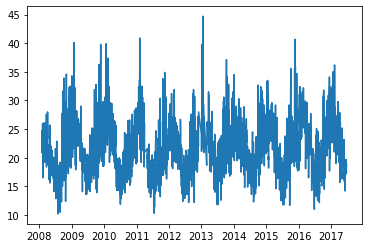

In [9]:
syd['Year'] = syd['Date'].apply(lambda x: x.year)
syd = syd[syd['Year']<=2018]
plt.plot(syd['Date'], syd['Temp3pm'])
plt.show()

In [10]:
data = syd[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-74b34f345573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
30176,2008-02-01,20.9
30177,2008-02-02,24.8
30178,2008-02-03,23.0
30179,2008-02-04,20.9
30180,2008-02-05,25.5


In [11]:
data

,ds,y
30176,2008-02-01,20.9
30177,2008-02-02,24.8
30178,2008-02-03,23.0
30179,2008-02-04,20.9
30180,2008-02-05,25.5
...,...,...
33515,2017-06-21,17.9
33516,2017-06-22,18.7
33517,2017-06-23,17.3
33518,2017-06-24,19.0


# 2. Train Model

In [12]:
m = NeuralProphet()

In [13]:
?m.fit

Signature: m.fit(df, freq='auto', validation_df=None, progress='bar', minimal=False)
Docstring:
Train, and potentially evaluate model.

Parameters
----------
    df : pd.DataFrame, dict
        containing column ``ds``, ``y`` with all data
    freq : str
        Data step sizes. Frequency of data recording,

        Note
        ----
        Any valid frequency for pd.date_range, such as ``5min``, ``D``, ``MS`` or ``auto`` (default) to automatically set frequency.
    validation_df : pd.DataFrame, dict
        if provided, model with performance  will be evaluated after each training epoch over this data.
    epochs : int
        number of epochs to train (overrides default setting).
        default: if not specified, uses self.epochs
    progress : str
        Method of progress display

        Options
            * (default) ``bar`` display updating progress bar (tqdm)
            * ``print`` print out progress (fallback option)
            * ``plot`` plot a live updating graph of t

In [14]:
model = m.fit(data, freq='D')

#, epochs=1000 -- throwing error

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 137


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.17E-02, min: 1.07E+00


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.17E-02, min: 1.45E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.74E-02
Epoch[137/137]: 100%|██████████| 137/137 [00:26<00:00,  5.22it/s, SmoothL1Loss=0.0135, MAE=2.18, RMSE=2.94, RegLoss=0]


# 3. Forecast Away

In [15]:
future = m.make_future_dataframe(data, periods=2500)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,17.185152,NaN,22.167822,-4.978289,-0.004382
1,2017-06-27,None,17.154835,NaN,22.168026,-4.987507,-0.025686
2,2017-06-28,None,17.098808,NaN,22.168232,-4.991504,-0.077919
3,2017-06-29,None,17.328777,NaN,22.168438,-4.990499,0.150838
4,2017-06-30,None,17.279785,NaN,22.168642,-4.984741,0.095884


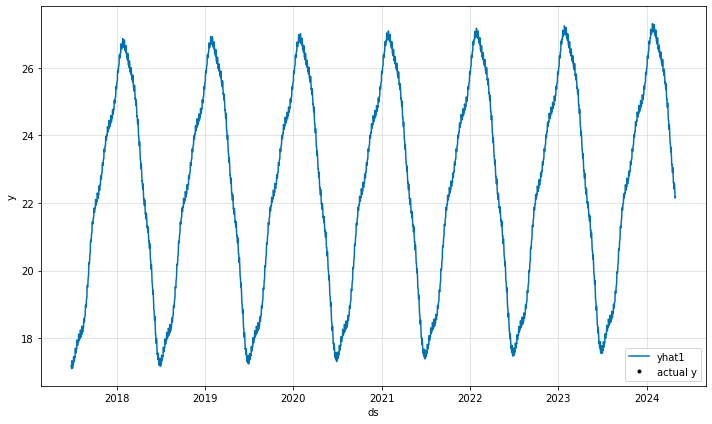

In [16]:
plot1 = m.plot(forecast)

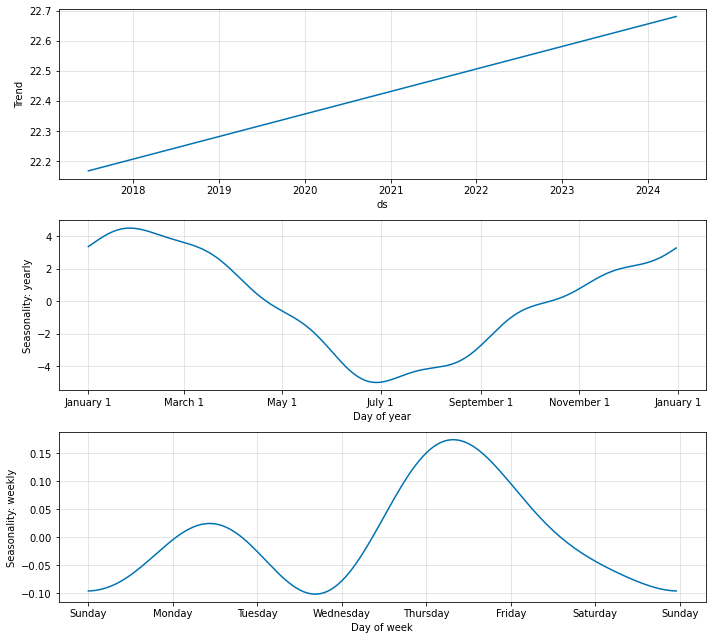

In [17]:
plt2 = m.plot_components(forecast)

# 4. Save Model

In [18]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [19]:
del m

In [20]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [21]:
future = m.make_future_dataframe(data, periods=2500)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,17.185152,NaN,22.167822,-4.978289,-0.004382
1,2017-06-27,None,17.154835,NaN,22.168026,-4.987507,-0.025686
2,2017-06-28,None,17.098808,NaN,22.168232,-4.991504,-0.077919
3,2017-06-29,None,17.328777,NaN,22.168438,-4.990499,0.150838
4,2017-06-30,None,17.279785,NaN,22.168642,-4.984741,0.095884


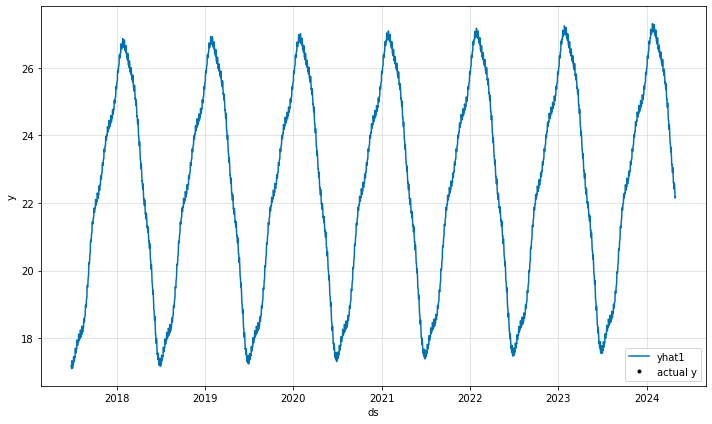

In [22]:
plot1 = m.plot(forecast)

In [23]:
forecast.to_csv("forecast.csv")
